## $\epsilon$-machine

We will test the performance of our method, $\epsilon$-machine (EM), in inferring couplings $W_{ij}$ from synthetic data.

First of all, we import the necessary packages to the Jupyter notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emachine as EM

In [2]:
np.random.seed(0)

We consider a system of `n_var` variables that interact with each other using a coupling variability parameter `g`. The number of observed sequences is `n_seq`.

In [3]:
# parameter setting
n_var = 40
g = 0.5
n_seq = 2000

Using the function `EM.generate_seq`, we synthesize non-time series of variable states, `seqs`. The actual interaction between variables is represented by `w_true`. In this code, `w_true` includes linear terms and quadratic terms.

In [4]:
w_true,seqs = EM.generate_seq(n_var,n_seq,g=g)

For convenience and to reduce computing time (in python), we use Einstein conventions to convert linear and quadratic terms: $\{ops\} = \{\sigma_i, \sigma_i \sigma_j\}$ (with $i < j$). So that, `ops` is a matrix of `n_seq` x `n_var + 0.5*n_var*(n_var-1)`.

In [5]:
ops = EM.operators(seqs)
ops.shape

(2000, 820)

We will use the function `EM.fit` to run the EM with various values of `eps` from 0 to 1. The outputs are inferred interactions `w_eps` and the mean energy of observed configurations `E_eps`.

In [6]:
eps_list = np.linspace(0.4,0.9,6)
E_eps = np.zeros(len(eps_list))
w_eps = np.zeros((len(eps_list),ops.shape[1]))
for i,eps in enumerate(eps_list):    
    w_eps[i,:],E_eps[i] = EM.fit(ops,eps=eps,max_iter=100)
    print(eps,E_eps[i])

0.4 -7.29132964964224
0.5 -6.550308616840322
0.6000000000000001 -6.142749870702957
0.7000000000000001 -5.96056297652681
0.8 -5.965516508843928
0.9 -6.1812652765582685


We calculate the mean squared error between the actual and predicted interactions: `MSE = np.mean((w_eps - w_true[np.newaxis,:])**2, axis = 1)`.

In [7]:
MSE_eps = np.mean((w_eps - w_true[np.newaxis,:])**2,axis=1)

As expected, `MSE` and `Energy` depend on `eps`.

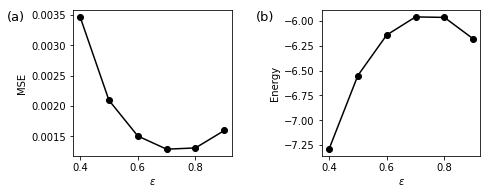

In [8]:
nx,ny = 2,1
nfig = nx*ny
fig, ax = plt.subplots(ny,nx,figsize=(nx*3.5,ny*2.8))

ax[0].plot(eps_list,MSE_eps,'ko-')
ax[1].plot(eps_list,E_eps,'ko-')

ax[0].set_xlabel('$\epsilon$')
ax[0].set_ylabel('MSE')
ax[1].set_xlabel('$\epsilon$')
ax[1].set_ylabel('Energy')

label = ['(a)','(b)','(c)','(d)','(e)','(g)','(d)','(h)']
xlabel = np.full(nfig,-0.3)
ylabel = np.full(nfig,1.)
k = 0
for i in range(nx):     
    ax[i].text(xlabel[k],ylabel[k],label[k],transform=ax[i].transAxes,va='top',ha='right',fontsize=13)
    k += 1
        
plt.tight_layout(h_pad=1, w_pad=1.5)
#plt.savefig('fig1.pdf', format='pdf', dpi=100)

It is important to note that mean squared error `MSE_eps` and energy `E` respectively become minimal and maximal at the same optimal `eps`, so we can use `E_eps` to infer optimal `eps`.

In [9]:
ieps = np.argmax(E_eps)
print('The optimal value of eps:',eps_list[ieps])

The optimal value of eps: 0.7000000000000001


So our inferred interactions from our eps machine should be

In [10]:
w = w_eps[ieps]

We compare `w` and `w_true`.

([<matplotlib.axis.YTick at 0x7f65fb61ab70>,
 <a list of 3 Text yticklabel objects>)

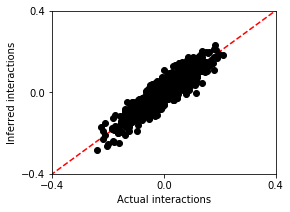

In [12]:
plt.figure(figsize=(4,3))

plt.plot([-1,1],[-1,1],'r--')
plt.plot(w_true,w,'ko')
plt.xlabel('Actual interactions')
plt.ylabel('Inferred interactions')
plt.xlim([-0.4,0.4])
plt.ylim([-0.4,0.4])
plt.xticks([-0.4,0,0.4])
plt.yticks([-0.4,0,0.4])

As you see, the inferred interactions look very similar to the actual interactions!